# Data Analysis
## DailyDialog
DailyDialog dataset data exploration to retrieve sentiment lexicon and dataset creation. 

@input: text file (txt) 
    each line is a conversation. sentences are separated by "__eou__" tokens
    
@output: json file
    attributes: conv_id, utterance, emotion

In [1]:
import data_analysis as data_analysis

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [2]:
data_location = "../data/dailydialog/train/dialogues_train.txt"
labels_location = "../data/dailydialog/train/dialogues_emotion_train.txt"

data_location_dev = "../data/dailydialog/validation/dialogues_validation.txt"
labels_location_dev = "../data/dailydialog/validation/dialogues_emotion_validation.txt"

data_location_test = "../data/dailydialog/test/dialogues_test.txt"
labels_location_test = "../data/dailydialog/test/dialogues_emotion_test.txt"

In [3]:
data_txt = open(data_location, "r")
labels_txt = open(labels_location, "r")

df = data_analysis.text2dataframe_daily_dialog(data_txt, labels_txt)

conversation: 11118it [06:42, 27.60it/s]


In [4]:
data_txt_dev = open(data_location_dev, "r")
labels_txt_dev = open(labels_location_dev, "r")

df_dev = data_analysis.text2dataframe_daily_dialog(data_txt_dev, labels_txt_dev)

conversation: 1000it [00:22, 44.04it/s]


In [5]:
data_txt_test = open(data_location_test, "r")
labels_txt_test = open(labels_location_test, "r")

df_test = data_analysis.text2dataframe_daily_dialog(data_txt_test, labels_txt_test)

conversation: 1000it [00:20, 49.08it/s]


In [6]:
df.head()

,conv_id,utterance,emotion
0,0,"Say , Jim , how about going for a few beers af...",0
1,0,You know that is tempting but is really not g...,0
2,0,What do you mean ? It will help us to relax .,0
3,0,Do you really think so ? I don't . It will ju...,0
4,0,I guess you are right.But what shall we do ? ...,0


In [9]:
df.info()

df['conv_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87170 entries, 0 to 87169
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   conv_id    87170 non-null  object
 1   utterance  87170 non-null  object
 2   emotion    87170 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


11118

In [10]:
df_dev.info()

df_dev['conv_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8069 entries, 0 to 8068
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   conv_id    8069 non-null   object
 1   utterance  8069 non-null   object
 2   emotion    8069 non-null   object
dtypes: object(3)
memory usage: 189.2+ KB


1000

In [11]:
df_test.info()

df_test['conv_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   conv_id    7740 non-null   object
 1   utterance  7740 non-null   object
 2   emotion    7740 non-null   object
dtypes: object(3)
memory usage: 181.5+ KB


1000

In [7]:
emotions = {'no emotion': 0, 'anger': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'sadness': 5, 'surprise': 6}
list(emotions.values())

[0, 1, 2, 3, 4, 5, 6]

In [8]:
def split_corpus_by_emotion(emotions, dataframe):
    emotions_corpus_dict = {}

    for emotion in emotions:
        emotions_corpus_dict[emotion] = []

        # only select portion of the corpus correspondent to the specified emotion
        emotion_df = dataframe[dataframe['emotion'] == str(emotion)]
        emotion_corpus = emotion_df['utterance'].values

        for utterance in emotion_corpus:
            emotions_corpus_dict[emotion].append(utterance.strip())
            
    return emotions_corpus_dict

emotions_corpus_dict = split_corpus_by_emotion(list(emotions.values()), df)
emotions_corpus_dict_dev = split_corpus_by_emotion(list(emotions.values()), df_dev)
emotions_corpus_dict_test = split_corpus_by_emotion(list(emotions.values()), df_test)
        
emotions_corpus_dict[0][:5]

['Say , Jim , how about going for a few beers after dinner ?',
 'You know that is tempting but is really not good for our fitness .',
 'What do you mean ? It will help us to relax .',
 "Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?",
 "I guess you are right.But what shall we do ? I don't feel like sitting at home ."]

### Balancing

In [9]:
total = 0

print("Train set balancing \n")
for emotion in emotions_corpus_dict:
    print(len(emotions_corpus_dict[emotion]))
    total += len(emotions_corpus_dict[emotion])

print("\nTrain set percentage balancing")
for emotion in emotions_corpus_dict:
    print(len(emotions_corpus_dict[emotion])/total)

Train set balancing 

72143
827
303
146
11182
969
1600

Train set percentage balancing
0.8276127107949983
0.009487208902145234
0.003475966502237008
0.0016748881495927499
0.12827807732017896
0.011116209705173798
0.01835493862567397


In [10]:
total = 0

print("Dev set balancing \n")
for emotion in emotions_corpus_dict_dev:
    print(len(emotions_corpus_dict_dev[emotion]))
    total += len(emotions_corpus_dict_dev[emotion])
    
print("\nDev set percentage balancing")
for emotion in emotions_corpus_dict_dev:
    print(len(emotions_corpus_dict_dev[emotion])/total)

Dev set balancing 

7108
77
3
11
684
79
107

Dev set percentage balancing
0.8809022183665882
0.009542694261990333
0.0003717932829346883
0.0013632420374271904
0.08476886850910893
0.009790556450613459
0.013260627091337216


In [11]:
total = 0

print("Test set balancing \n")
for emotion in emotions_corpus_dict_test:
    print(len(emotions_corpus_dict_test[emotion]))
    total += len(emotions_corpus_dict_test[emotion])
    
print("\nTest set percentage balancing")
for emotion in emotions_corpus_dict_test:
    print(len(emotions_corpus_dict_test[emotion])/total)

Test set balancing 

6321
118
47
17
1019
102
116

Test set percentage balancing
0.8166666666666667
0.01524547803617571
0.00607235142118863
0.0021963824289405686
0.13165374677002584
0.01317829457364341
0.014987080103359173


[0 1 2 3 4 5 6]


/Users/isabeldias/Documents/Envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


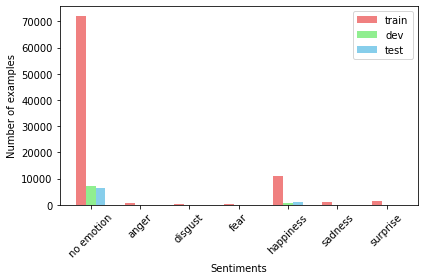

In [24]:
x = np.arange(len(emotions))
print(x)

ax = plt.subplot(111)
ax.bar(x-0.2, [len(emotions_corpus_dict[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightcoral', label='train')
ax.bar(x, [len(emotions_corpus_dict_dev[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightgreen', label='dev')
ax.bar(x+0.2, [len(emotions_corpus_dict_test[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='skyblue', label='test')
ax.set_xticklabels(['0', 'no emotion','anger','disgust','fear','happiness','sadness','surprise'], rotation=45)
ax.legend()

plt.ylabel('Number of examples')
plt.xlabel('Sentiments')

plt.tight_layout()

plt.savefig("balancing_dailydialog.jpeg", dpi=300)

### Simple Term Frequency

In [9]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,3), stop_words='english')

vocabulary_tf_sorted = {}

for emotion in tqdm(emotions.values(), desc="emotion"):
    # returns document x term matrix
    X = vectorizer.fit_transform(emotions_corpus_dict[emotion])
    
    tf_corpus = []
    
    term_doc_matrix = X.T
    
    for term_count in term_doc_matrix:
        tf_corpus.append(np.sum(term_count))
        
    vocabulary_tf = zip(vectorizer.get_feature_names(), tf_corpus)
    
    vocabulary_tf_reduced = [(word, tf) for (word, tf) in vocabulary_tf if tf > 2]
    
    vocabulary_tf_sorted[emotion] = sorted(vocabulary_tf_reduced, key = lambda x: x[1], reverse=True)

emotion: 100%|██████████| 7/7 [00:57<00:00,  8.18s/it]


In [10]:
for emotion in vocabulary_tf_sorted:
    print(emotion)
    print(vocabulary_tf_sorted[emotion][:10])
    print("---------------------------")

0
[('like', 5041), ('yes', 4616), ('don', 3957), ('think', 3493), ('ll', 3306), ('know', 3215), ('just', 3000), ('right', 2702), ('good', 2685), ('want', 2496)]
---------------------------
1
[('don', 94), ('just', 71), ('ve', 63), ('really', 56), ('time', 52), ('like', 48), ('oh', 48), ('know', 45), ('didn', 43), ('want', 42)]
---------------------------
2
[('don', 38), ('like', 33), ('think', 30), ('really', 28), ('hate', 25), ('just', 16), ('oh', 16), ('time', 15), ('people', 14), ('sick', 13)]
---------------------------
3
[('just', 27), ('don', 15), ('scared', 14), ('know', 13), ('oh', 13), ('nervous', 9), ('think', 9), ('afraid', 8), ('didn', 8), ('don know', 7)]
---------------------------
4
[('thank', 1245), ('good', 1187), ('like', 887), ('thanks', 834), ('great', 790), ('ll', 781), ('yes', 601), ('really', 574), ('oh', 453), ('nice', 442)]
---------------------------
5
[('sorry', 302), ('oh', 87), ('know', 80), ('just', 76), ('really', 73), ('afraid', 70), ('don', 69), ('ve', 

### TF-IDF

**Idea**: The sentences of a single sentiment will belong to a unique document. We will rank each token of the document when compared to the full corpus.

**Note**: Each document will be a string with all sentences belonging to a single sentiment. 

In [11]:
corpus_by_emotion = []

for emotion in tqdm(emotions.values(), desc="emotion"): 
    corpus = ""
    
    # select examples of the corpus that are labelled with the specific sentiment 
    emotion_df = df[df['emotion'] == str(emotion)]
    emotion_corpus = emotion_df['utterance'].values
    
    # preprocessing + building string corpus
    for sentence in tqdm(emotion_corpus, desc="sentence"):
        corpus += data_analysis.preprocessing(sentence, lower=True, punct=True) + " "
        
    corpus_by_emotion.append(corpus)

sentence: 100%|██████████| 827/827 [00:00<00:00, 248277.82it/s]

sentence: 100%|██████████| 303/303 [00:00<00:00, 237679.84it/s]

sentence: 100%|██████████| 146/146 [00:00<00:00, 97201.33it/s]

sentence: 100%|██████████| 11182/11182 [00:00<00:00, 239679.41it/s]

emotion: 100%|██████████| 7/7 [00:00<00:00, 17.21it/s]


In [12]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer="word", sublinear_tf=True)

tfidf_vectorspace = tfidf_vectorizer.fit_transform(corpus_by_emotion)

In [13]:
# matrix: emotion x tokens
tfidf_vectorspace.shape

(7, 801947)

In [17]:
emotions_lexicon = {}

n = 10

feature_array = np.array(tfidf_vectorizer.get_feature_names())

emotions_values = list(emotions.values())

for i, tfidf_scores in tqdm(enumerate(tfidf_vectorspace)):
    tfidf_sorting = np.argsort(tfidf_scores.toarray()).flatten()[::-1]
    top_n = feature_array[tfidf_sorting][:n]
    
    emotions_lexicon[emotions_values[i]] = top_n  

1it [00:00,  9.48it/s]

[0, 1, 2, 3, 4, 5, 6]


7it [00:00, 10.06it/s]


In [18]:
emotions_lexicon

{0: array(['help you yes', 'do for', 'do for you', 'can do for', 'may help',
        'yes here', 'may help you', 'would you like', 'education',
        'how about'], dtype='<U41'),
 1: array(['damn', 'you', 'to', 'the', 'it', 'shut', 'shut up', 'damn it',
        'that', 'oh shut'], dtype='<U41'),
 2: array(['the', 'it', 'complete waste', 'complete waste of', 'to', 'you',
        'waste of time', 'hate the', 'of', 'are terrible they'],
       dtype='<U41'),
 3: array(['can call the', 'scared', 'the', 'it finally just',
        'finally just when', 'just stood there', 'imagining it finally',
        'imagining it', 'imagining', 'just stood'], dtype='<U41'),
 4: array(['thank you for', 'bye', 'sounds good', 'you thank you',
        'you thank', 'that good idea', 'welcome', 'thank you so',
        'sounds great', 'wonderful'], dtype='<U41'),
 5: array(['sorry sir', 'to', 'lost my', 'sorry', 'am sorry', 'the',
        'am awfully', 'am awfully sorry', 'sorry we', 'it'], dtype='<U41'),
 6: 